In [4]:
from tweet import *
from poll import *
from candidate import *
import pandas as pd
import numpy as np
import tweepy
import json
import calendar
import datetime
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import time

In [7]:
# Getting polls
# all code copied over from pollster_setup.ipnyb

f_polls = open("dist/poll_data.json")
data = json.load(f_polls)

polls = [None]*(len(data))
for i in range(len(data)):
    polls[i] = (Poll(data[i]))
    
candidate_set = set()
for p in polls:
    p.update_candidates(candidate_set)
    
polls.sort(key = lambda x: x.end_date)

In [8]:
#TODO: Fill this in

consumer_key = "BeC8UJbqCHyX6pTWAvEvvIcGJ"
consumer_secret = "IwEzqplLUKar6MFZ7l828tLbEpxG3ObD49llOSPJ6Y6phKzVYT"
access_token = "727703646331240448-31ZFnJzKYfDcHh3HIgBhd1FfU3W7VaO"
access_token_secret = "GprFSIZ18ukkn9lZb7INfEn78miwkXzWpkzyJ6ocLAg6J"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [9]:
month_abbrs = dict((v,k) for k,v in enumerate(calendar.month_abbr))

most_recent_rankings = ['bennet',
                         'castro',
                         'booker',
                         'klobuchar',
                         'gabbard',
                         'yang',
                         'harris',
                         'buttigieg',
                         'warren',
                         'sanders',
                         'biden']

last_name_to_handle = {'bennet': 'MichaelBennet',
                         'castro': 'JulianCastro',
                         'booker': 'CoryBooker',
                         'klobuchar': 'amyklobuchar',
                         'gabbard': 'TulsiGabbard',
                         'yang': 'AndrewYang',
                         'harris': 'KamalaHarris',
                         'buttigieg': 'PeteButtigieg',
                         'warren': 'ewarren',
                         'sanders': 'BernieSanders',
                         'biden': 'JoeBiden'}

handle_to_last_name = {}
for i in last_name_to_handle:
    handle_to_last_name[last_name_to_handle[i].lower()] = i

In [10]:
def get_tweet_time(time_str):
    global month_abbrs
    time_lst = time_str.split(" ")
    year = int(time_lst[-1])
    day = int(time_lst[2])
    month = month_abbrs[time_lst[1]]
    return datetime.date(year, month, day)    

In [12]:
startDate =   datetime.datetime(2019, 9, 13, 0, 0, 0)
# startDate =   datetime.datetime(2019, 11, 1, 0, 0, 0)
endDate = datetime.datetime(2019, 11, 23, 0, 0, 0)
tweets = {}
cand_handles = ['AndrewYang', 'ewarren', 'PeteButtigieg', 'BernieSanders', 
                'MichaelBennet', 'amyklobuchar', 'KamalaHarris', 'TulsiGabbard', 
                'JulianCastro', 'CoryBooker', 'JoeBiden']

for cand_name in cand_handles:
    print(cand_name)
    cand_tweets = []
    tweets[cand_name] = cand_tweets
    try:
        tmpTweets = api.user_timeline(cand_name, tweet_mode='extended')
    except tweepy.TweepError:
        print("tweepyError 2")
        time.sleep(60 * 15)
        continue
    except StopIteration:
        break
    for t in tmpTweets:
        if t.created_at < endDate and t.created_at > startDate:
            cand_tweets.append(t)
    if len(cand_tweets) > 0:
        print(cand_tweets)
    try:
        while (tmpTweets[-1].created_at > startDate):
            print(tmpTweets[-1].created_at)
            tmpTweets = api.user_timeline(cand_name, max_id = tmpTweets[-1].id, tweet_mode='extended')
            for ti in tmpTweets:
                if ti.created_at < endDate and ti.created_at > startDate:
                    t = ti._json
                    if t['full_text'].startswith('RT @'):
                        # skip if a retweet
                        continue
                        
                    tw_obj = Tweet(t['full_text'], get_tweet_time(t['created_at']), cand_name)
                    if not tw_obj.get_clean_text().count(" ") < 15:
                        if 'media' in t['entities']:
                            tw_obj.contains_media()
                        if len(t['entities']['urls']) > 0:
                            tw_obj.contains_link()
                        if t['in_reply_to_screen_name'] and t['in_reply_to_screen_name'] != cand_name:
                            tw_obj.is_response()
                        cand_tweets.append(tw_obj)
    except tweepy.TweepError:
        time.sleep(60 * 15)
        print("tweepyError 2")
        continue
#     except:
#         print(len(cand_tweets))
#         print(len(tmpTweets))

AndrewYang
2019-12-09 03:26:30
2019-12-08 21:06:31
2019-12-08 18:40:05
2019-12-08 03:15:33
2019-12-07 22:53:29
2019-12-07 17:01:42
2019-12-06 20:54:57
2019-12-06 06:04:16
2019-12-05 21:48:51
2019-12-05 05:11:04
2019-12-04 23:24:05
2019-12-04 18:11:58
2019-12-04 01:48:08
2019-12-03 23:17:37
2019-12-03 03:24:56
2019-12-02 23:21:55
2019-12-02 14:57:09
2019-12-02 03:05:13
2019-12-01 23:00:02
2019-12-01 20:34:26
2019-12-01 18:55:24
2019-12-01 01:59:58
2019-11-30 23:47:12
2019-11-30 01:36:11
2019-11-29 00:56:20
2019-11-28 22:25:24
2019-11-28 18:36:01
2019-11-28 00:27:17
2019-11-27 18:33:52
2019-11-27 06:02:47
2019-11-27 02:47:28
2019-11-26 15:51:30
2019-11-26 03:33:04
2019-11-26 00:30:12
2019-11-25 18:31:52
2019-11-25 03:49:37
2019-11-24 20:10:23
2019-11-23 23:38:16
2019-11-23 03:16:01
2019-11-22 19:06:11
2019-11-22 02:21:05
2019-11-21 18:47:52
2019-11-21 03:52:48
2019-11-21 01:54:15
2019-11-20 05:02:19
2019-11-19 04:49:58
2019-11-18 17:08:31
2019-11-17 20:01:52
2019-11-17 03:03:05
2019-11-1

2019-10-21 09:28:33
2019-10-18 18:41:25
2019-10-16 21:35:59
2019-10-15 23:55:11
2019-10-12 18:35:34
2019-10-10 10:38:55
2019-10-07 02:44:14
2019-10-05 00:23:33
2019-10-02 22:34:04
2019-09-30 01:11:15
2019-09-27 03:22:07
2019-09-24 12:34:21
2019-09-21 13:22:57
2019-09-19 02:36:52
2019-09-16 19:57:29
2019-09-13 23:02:22
2019-09-13 00:53:07
KamalaHarris
2019-12-01 02:10:00
2019-11-27 19:53:00
2019-11-25 17:00:30
2019-11-22 20:36:00
2019-11-21 03:52:55
2019-11-20 02:42:00
2019-11-18 03:28:16
2019-11-16 03:39:00
2019-11-14 14:54:51
2019-11-12 16:01:37
2019-11-09 19:42:02
2019-11-07 18:48:01
2019-11-06 04:53:08
2019-11-04 19:23:23
2019-11-02 17:05:01
2019-11-01 17:45:01
2019-10-30 20:32:22
2019-10-29 00:02:00
2019-10-27 12:29:00
2019-10-24 21:17:01
2019-10-23 00:02:00
2019-10-20 13:15:02
2019-10-18 00:03:00
2019-10-16 18:28:50
2019-10-16 00:19:23
2019-10-14 00:05:00
2019-10-12 01:13:28
2019-10-10 21:47:05
2019-10-09 02:52:40
2019-10-07 14:55:01
2019-10-04 20:36:00
2019-10-03 00:42:57
2019-10

In [ ]:

# for k in cand_handles:    
#     warren_tweets = tweets[k]
#     zzzzzzzzzzz = 0
#     for i in range(len(warren_tweets)):
#         if not warren_tweets[i].raw_text.lower().startswith('rt') and not warren_tweets[i]._clean_text.count(" ") < 15:
#     #         print(warren_tweets[i].raw_text)
#     #         print(warren_tweets[i].get_sentiment()[0])

#             zzzzzzzzzzz += 1
#     print(k + "    " + str(zzzzzzzzzzz))

In [44]:
def total_avg_sentiment(cand):
    global tweets
    cand_t = tweets[cand]
    sent_sum = float(0)
    num_counted = float(0)
    for i in range(len(cand_t)):
        if not (cand_t[i]._clean_text).count(" ") < 15:
            sent_sum += cand_t[i].get_sentiment()[0]
            num_counted += 1
    return sent_sum/num_counted


In [25]:
poll_dates = []
time_tweets = {}
    
for j in polls:
    poll_dates.append(j.start_date)
poll_dates.append(datetime.date(2020, 10, 10)) # dummy time to avoid null pointer in next for loop
poll_dates.sort()

for j in tweets:
    curr_poll = 0
    time_tweets[j] = {}
    for i in tweets[j]:
        if curr_poll != len(polls)-1 and i.date >= polls[curr_poll+1].end_date:
            curr_poll += 1
        if polls[curr_poll] not in time_tweets[j]:
            time_tweets[j][polls[curr_poll]] = []
        time_tweets[j][polls[curr_poll]].append(i)

In [14]:
print(poll_dates)

[datetime.date(2019, 9, 13), datetime.date(2019, 9, 14), datetime.date(2019, 9, 15), datetime.date(2019, 9, 16), datetime.date(2019, 9, 19), datetime.date(2019, 9, 20), datetime.date(2019, 9, 21), datetime.date(2019, 9, 22), datetime.date(2019, 9, 22), datetime.date(2019, 9, 23), datetime.date(2019, 9, 23), datetime.date(2019, 9, 26), datetime.date(2019, 9, 28), datetime.date(2019, 9, 30), datetime.date(2019, 10, 4), datetime.date(2019, 10, 6), datetime.date(2019, 10, 6), datetime.date(2019, 10, 6), datetime.date(2019, 10, 7), datetime.date(2019, 10, 11), datetime.date(2019, 10, 13), datetime.date(2019, 10, 15), datetime.date(2019, 10, 16), datetime.date(2019, 10, 16), datetime.date(2019, 10, 17), datetime.date(2019, 10, 17), datetime.date(2019, 10, 18), datetime.date(2019, 10, 20), datetime.date(2019, 10, 21), datetime.date(2019, 10, 21), datetime.date(2019, 10, 21), datetime.date(2019, 10, 23), datetime.date(2019, 10, 24), datetime.date(2019, 10, 27), datetime.date(2019, 10, 27), dat

In [64]:
def get_poll_pos(c, p):
    global handle_to_last_name
    for po in range(len(p.sorted_results)):
        if p.sorted_results[po][1].lower() == handle_to_last_name[c.lower()].lower():
            return len(handle_to_last_name)-po
    return 11
            

In [125]:
import sys
del sys.modules['tweet']
from tweet import *

In [126]:
df = pd.DataFrame({'cand_name' : [], 'sentiment' : [], 'other_mentions' : [], 'poll_position': []})

for j in time_tweets:
    for po in time_tweets[j]:
        for t in time_tweets[j][po]:
            if not t._clean_text.count(" ") < 15:
                t.set_other_mentions()
                df = df.append({'cand_name': j , 'sentiment' : t._polarity, 
                                'other_mentions': t.get_other_mentions(), 
                                'poll_position': get_poll_pos(j, po), 'poll_date': po.end_date,
                                'raw_text': t.raw_text} , ignore_index=True)
        #         sent = avg_sentiment(j)
                
df.to_csv("tweet.csv", index=False)

In [ ]:
# TODO: create table where y value is tweeters standing in most recent poll at the date of the tweet
# x values are sentiment of a tweet, mentions, and topic
# run regression on all of the tweets

In [ ]:
cand_sentiments

sentiment_nums

In [127]:
df_by_date = df.copy()
pos_avg_sentiment = df_by_date.groupby(['cand_name', 'poll_position'], as_index=False)['sentiment'].mean()
avg_sentiment_by_poll = df_by_date.groupby(['cand_name', 'poll_date', 'poll_position'], as_index=False)['sentiment'].mean()
pos_mode_mentions = df_by_date.groupby(['cand_name', 'poll_position'], as_index=False)['other_mentions'].agg(pd.Series.mode)
mode_mentions_by_poll = df_by_date.groupby(['cand_name', 'poll_date', 
                                            'poll_position'], as_index=False)['other_mentions'].agg(pd.Series.mode)
# for i in range(mode_mentions_by_poll.shape[0]):
#     r = mode_mentions_by_poll.loc[i]
#     if type(r.other_mentions) != type(mode_mentions_by_poll.loc[1].other_mentions): #checks if float
#         for j in range(1, len(r.other_mentions)):
#             mode_mentions_by_poll.append({'cand_name': r.cand_name, 'poll_position': r.poll_position,
#                                      'poll_date': r.poll_date, 'other_mentions': r.other_mentions[j]}, ignore_index = True)
#         r.other_mentions = r.other_mentions[0]

# for i in range(pos_mode_mentions.shape[0]):
#     r = pos_mode_mentions.loc[i]
#     if type(r.other_mentions) != type(mode_mentions_by_poll.loc[1].other_mentions): #checks if float
#         for j in range(1, len(r.other_mentions)):
#             pos_mode_mentions.append({'cand_name': r.cand_name, 'poll_position': r.poll_position,
#                                      'other_mentions': r.other_mentions[j]}, ignore_index = True)
#         r.other_mentions = r.other_mentions[0]

In [48]:
avg_sentiment

,cand_name,poll_date,poll_position,sentiment
0,AndrewYang,2019-09-17,6.0,-0.050000
1,AndrewYang,2019-09-17,7.0,0.000000
2,AndrewYang,2019-09-21,7.0,0.308333
3,AndrewYang,2019-09-22,6.0,0.250000
4,AndrewYang,2019-09-23,4.0,0.058333
...,...,...,...,...
398,ewarren,2019-11-10,3.0,-0.083333
399,ewarren,2019-11-12,1.0,-0.086061
400,ewarren,2019-11-17,3.0,0.065584
401,ewarren,2019-11-19,2.0,-0.033911


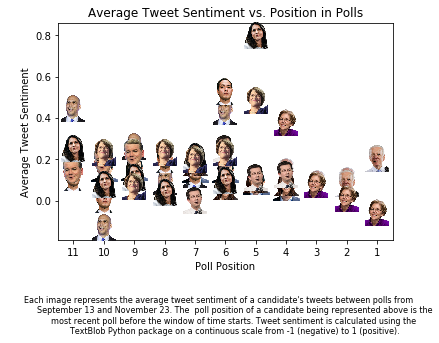

In [128]:
def getImage(path):
    if path == 'images/sanders.png':
        return OffsetImage(plt.imread(path), zoom = 0.02, interpolation='gaussian')
    elif path == 'images/bennet.png':
        return OffsetImage(plt.imread(path), zoom = 0.07, interpolation='gaussian')
    else:
        return OffsetImage(plt.imread(path), zoom = 0.08, interpolation='gaussian')

paths = ['images/bennet.png',
        'images/biden.png',
        'images/booker.png',
        'images/buttigieg.png',
        'images/castro.png',
        'images/gabbard.png',
        'images/harris.png',
        'images/klobuchar.png',
        'images/sanders.png',
        'images/warren.png',
        'images/yang.png']

x = pos_avg_sentiment['poll_position']
y = pos_avg_sentiment['sentiment']


fig, ax = plt.subplots()
ax.scatter(x, y, color = "white")
plt.xticks(np.arange(1, len(paths)+1, 1), np.arange(len(paths), 0, -1))

img_paths = {}
for i in most_recent_rankings:
    path_name = "images/" + i + ".png"
    img_paths[i] = getImage(path_name)

# for x0, y0, path in zip(x, y,paths):
for i in range(pos_avg_sentiment.shape[0]):
    cand_name = pos_avg_sentiment.loc[i].cand_name
    sent = pos_avg_sentiment.loc[i].sentiment
#     mentions = df.loc[i].other_mentions
    poll_pos = 12 - pos_avg_sentiment.loc[i].poll_position
    candidate_name = handle_to_last_name[cand_name.lower()]
#     path_name = "images/" + candidate_name + ".png"
#     ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False) # , box_alignment=(0.3,0.3))
    img = img_paths[candidate_name]
#     img.putalpha(128)
    ab = AnnotationBbox(img, (poll_pos, 
                            sent), frameon=False) # , box_alignment=(0.3,0.3))
    ax.add_artist(ab)

# plot line of best fit
# plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    
caption = """Each image represents the average tweet sentiment of a candidate's tweets between polls from 
            September 13 and November 23. The  poll position of a candidate being represented above is the
            most recent poll before the window of time starts. Tweet sentiment is calculated using the 
            TextBlob Python package on a continuous scale from -1 (negative) to 1 (positive)."""

plt.xlabel("Poll Position")
plt.ylabel("Average Tweet Sentiment")
plt.title("Average Tweet Sentiment vs. Position in Polls")
fig.text(.5, -.2, caption, ha='center', fontdict={'size': 8})


plt.savefig('my_figure_with_best_fit.pdf', bbox_inches='tight', dpi=400)

Text(0.5, -0.2, "Each image represents the average tweet sentiment of a candidate's tweets between polls from \n            September 13 and November 23. The  poll position of a candidate being represented above is the\n            most recent poll before the window of time starts. Tweet sentiment is calculated using the \n            TextBlob Python package on a continuous scale from -1 (negative) to 1 (positive).")

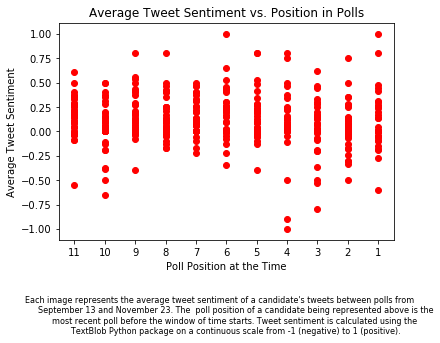

In [129]:
x = 12 - avg_sentiment_by_poll['poll_position']
y = avg_sentiment_by_poll['sentiment']

fig, ax = plt.subplots()
ax.scatter(x, y, color = "red")
plt.xticks(np.arange(1, len(paths)+1, 1), np.arange(len(paths), 0, -1))

caption = """Each image represents the average tweet sentiment of a candidate's tweets between polls from 
            September 13 and November 23. The  poll position of a candidate being represented above is the
            most recent poll before the window of time starts. Tweet sentiment is calculated using the 
            TextBlob Python package on a continuous scale from -1 (negative) to 1 (positive)."""

plt.xlabel("Poll Position at the Time")
plt.ylabel("Average Tweet Sentiment")
plt.title("Average Tweet Sentiment vs. Position in Polls")
fig.text(.5, -.2, caption, ha='center', fontdict={'size': 8})

In [82]:
mode_mentions_by_poll

,cand_name,poll_date,poll_position,other_mentions
0,AndrewYang,2019-09-17,6.0,0
1,AndrewYang,2019-09-17,7.0,0
2,AndrewYang,2019-09-21,7.0,0
3,AndrewYang,2019-09-22,6.0,0
4,AndrewYang,2019-09-23,4.0,1
...,...,...,...,...
396,ewarren,2019-11-10,3.0,0
397,ewarren,2019-11-12,1.0,0
398,ewarren,2019-11-17,3.0,0
399,ewarren,2019-11-19,2.0,0


C:\Users\pouya\Anaconda3\envs\candidate_tweet_analysis\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


<Figure size 432x288 with 0 Axes>

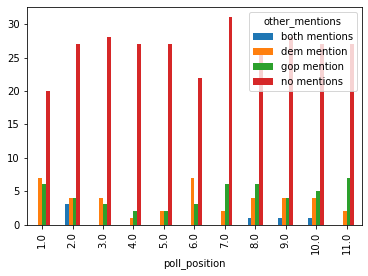

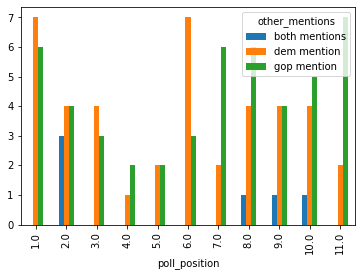

In [153]:
plt.clf()
mmbp = mode_mentions_by_poll[mode_mentions_by_poll.other_mentions.apply(type) == type(mode_mentions_by_poll.loc[1].other_mentions)]
x = 12 - mmbp['poll_position']
x_means = mmbp.groupby(['poll_position', 'other_mentions'], as_index = False).agg('count')
mention_dict = {0 : "no mentions", 1 : "dem mention", 2: "gop mention", 3: "both mentions"}

x_means = x_means[x_means.other_mentions != 4]
xmnnm = x_means[x_means.other_mentions != 0]
x_means['other_mentions'] = x_means['other_mentions'].map(mention_dict)
xmnnm['other_mentions'] = xmnnm['other_mentions'].map(mention_dict)


# graph 1
x_means.pivot("poll_position", "other_mentions", "cand_name").plot(kind='bar')
# caption = """Each image represents the average tweet sentiment of a candidate's tweets between polls from 
#             September 13 and November 23. The  poll position of a candidate being represented above is the
#             most recent poll before the window of time starts. Tweet sentiment is calculated using the 
#             TextBlob Python package on a continuous scale from -1 (negative) to 1 (positive)."""

# plt.xlabel("Poll Position at the Time")
# plt.ylabel("Average Tweet Sentiment")
# plt.title("Average Tweet Sentiment vs. Position in Polls")
# fig.text(.5, -.2, caption, ha='center', fontdict={'size': 8})
plt.show()


# graph 2
xmnnm.pivot("poll_position", "other_mentions", "cand_name").plot(kind='bar')
# caption = """Each image represents the average tweet sentiment of a candidate's tweets between polls from 
#             September 13 and November 23. The  poll position of a candidate being represented above is the
#             most recent poll before the window of time starts. Tweet sentiment is calculated using the 
#             TextBlob Python package on a continuous scale from -1 (negative) to 1 (positive)."""

# plt.xlabel("Poll Position at the Time")
# plt.ylabel("Average Tweet Sentiment")
# plt.title("Average Tweet Sentiment vs. Position in Polls")
# fig.text(.5, -.2, caption, ha='center', fontdict={'size': 8})
plt.show()

In [ ]:
# model fit for above graph
x_amy = x.copy()
del x_amy[3]
y_amy = y.copy()
del y_amy[3]
slope, intercept, r_value, p_value, std_err = linregress(x,y)
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(x_amy,y_amy)

In [ ]:
slope1

In [ ]:
from scipy.stats import iqr, linregress

In [ ]:
# outlier check for above graph
# q3 = np.quantile(y, 0.75)
# iqr = iqr(y)
for i in range(len(y)):
    if y[i] < 0:
        print(i)
        
print(y[-1])
    

In [ ]:
# import gensim
# import gensim.corpora as corpora
# from gensim.utils import simple_preprocess
# from gensim.models import CoherenceModel

# # spacy for lemmatization
# import spacy

# # Plotting tools
# import pyLDAvis
# import pyLDAvis.gensim  # don't skip this
# import matplotlib.pyplot as plt
# %matplotlib inline

In [ ]:
# lem_data = []
    
# def get_global_topics(cand):
#     global tweets
#     global lem_data
#     lem_data.append([list()])
#     cand_t = tweets[cand]
#     num_counted = float(0)
#     for i in range(len(cand_t)):
#         if not (cand_t[i]._clean_text).count(" ") < 15:
#             lem_data[-1] = lem_data[-1] + cand_t[i].data_lemmatized
#     temp = []
#     for i in lem_data[-1]:
#         temp = temp + i
#     lem_data[-1] = temp
#     return lem_data[-1]

# texts = [[]]
# dct = corpora.Dictionary(texts)  # initialize a Dictionary
# for i in tweets:
#     temp = get_global_topics(i)
#     dct.add_documents([temp])  # add more document (extend the vocabulary)
# #     get_global_topics(i)


# # id2word = corpora.Dictionary(lem_data)

# # Create Corpus
# ts = dct

# # Term Document Frequency
# corpus = [dct.doc2bow(text) for text in ts]
# lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                    id2word=id2word,
#                                    num_topics=10, 
#                                    random_state=100,
#                                    update_every=1,
#                                    chunksize=100,
#                                    passes=10,
#                                    alpha='auto',
#                                    per_word_topics=False)